<a href="https://colab.research.google.com/github/sprince0031/ICT-Python-ML/blob/main/Week%204/Notebooks/Week4_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python & ML Foundations: Session 4
## Data Visualization, Classification & Regression

Welcome to the session 4 reference notebook! This week, we move from Python fundamentals to the core workflow of a machine learning practitioner. We'll learn how to visualize data to gain insights, build our first classification models, and finish with the concept of regression.

**Libraries for this week:**
- `pandas`: For loading and manipulating our data.
- `matplotlib` & `seaborn`: For data visualization.
- `scikit-learn`: For building and evaluating our machine learning models.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  # https://seaborn.pydata.org/tutorial/aesthetics.html

# Load dataset
df = pd.read_csv('./sample_data/california_housing_train.csv')
df.head()

---

## 1. Data Visualisation

In this section, we'll explore why visualisation is the most critical first step in any data science project. We'll use the popular libraries Matplotlib and Seaborn to understand the `California Housing Dataset`.

### 4.1 - Histogram

In [ ]:
plt.figure(figsize=(12, 7)) # width, height
plt.hist(df['median_house_value'], bins=50, edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency (Number of Districts)')
plt.show()

In [ ]:
df[df['median_house_value'] > 500000].describe()

In [ ]:
df_filtered = df[df['median_house_value'] <= 500000]

In [ ]:
plt.figure(figsize=(12, 7))
plt.hist(df_filtered['median_house_value'], bins=50, edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency (Number of Districts)')
plt.show()

### 4.2 - Scatterplot

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(df_filtered['median_income'], df_filtered['median_house_value'], alpha=0.1)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value ($)')
plt.show()

### Some quick data engineering
Let's create a new feature which categorises housing data based on the `housing_median_age` feature. We want to categorise the data into 3 buckets: `New`, `Established`, `Historic`

In [ ]:
def classify_age(age):
    if age < 15:
        return 'New'
    elif age <= 35:
        return 'Established'
    else:
        return 'Historic'

df_filtered['age_category'] = df_filtered['housing_median_age'].apply(classify_age)

print("Our new feature in action:")
df_filtered[['housing_median_age', 'age_category']].head()

### 4.3 - Bar plot

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='age_category', y='median_house_value', data=df_filtered, order=['New', 'Established', 'Historic'])
plt.title('Average House Value by Age Category')
plt.show()

### 4.4 Box plot

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='age_category', y='median_house_value', data=df_filtered, order=['New', 'Established', 'Historic'])
plt.title('Distribution of House Values by Age Category')
plt.show()

### 4.5 Heatmap

In [ ]:
# Get Correlation Matrix from DataFrame
corr_matrix = df_filtered.corr(numeric_only=True)

# The Plot
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Numerical Features')
plt.show()

---

## 2. Regression

Regression is one type of supervised ML where we try to predict a value on a continuous scale rather than classify into a class.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data and filter out the cap
df = pd.read_csv('sample_data/california_housing_train.csv')
df = df[df['median_house_value'] < 500001]

### 2.1 Preparing dataset

In [3]:
# X must be a 2D DataFrame (features)
X = df[['median_income']]
# y can be a 1D Series (target)
y = df['median_house_value']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (16186, 1)
Shape of y: (16186,)


### 2.2 Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 12948
Testing samples: 3238


### 2.3 Implementing Linear Regression

In [5]:
# 1. Initialize the model
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

print("Model has been trained!")

Model has been trained!


### 2.4 Checking slope and intercept of model

In [6]:
# coef_ returns a list as each input feature will have a weight. Since we have 1 feature, we call the first value at zeroth index
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Slope (m): 40241.79
Intercept (b): 44427.53


### 2.5 Evaluating the model on test set
We can find the mean squared error for the regression model on the test set we split the data into i.e., 20% of the data.

In [7]:
# Make predictions on unseen test data
y_predictions = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 5612595507.64


Taking root of MSE (RMSE) for interpretability

In [9]:
# Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

Root Mean Squared Error (RMSE): $74917.26


### 2.6 Plotting the regression line on test data

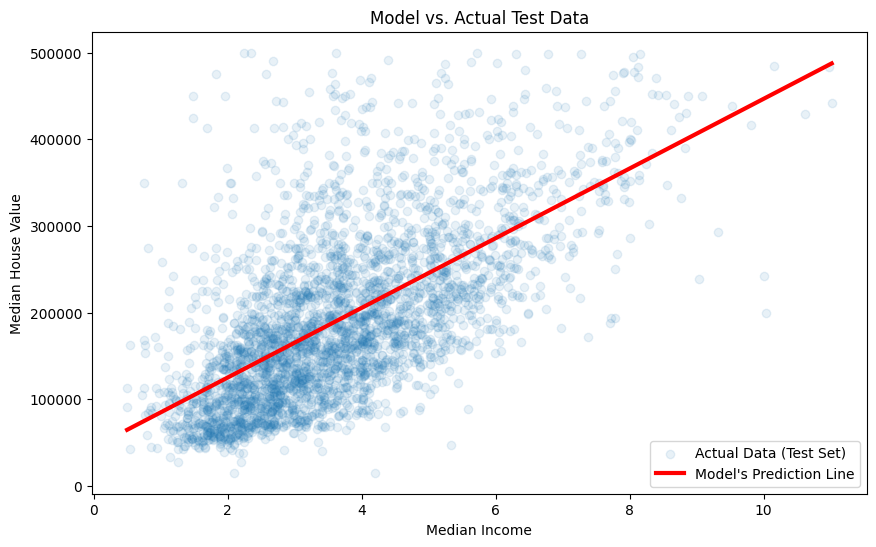

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.1, label='Actual Data (Test Set)')

test_data_sorted = X_test.sort_values(by='median_income')
predictions_sorted = model.predict(test_data_sorted) # Use trained model to predict housing prices based on sorted input feature
plt.plot(test_data_sorted, predictions_sorted, color='red', linewidth=3, label='Model\'s Prediction Line')

plt.title('Model vs. Actual Test Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

---

## 3. Classification